In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [3]:
ebay = pd.read_csv("http://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
ebay

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1


- butiynow는 경매인데 경매를 통하지 않고 바로 구매한 것
- carrier는 통신사. 왜 통신사가 있냐면 핸드폰에 통신사가 연결된 거를 생각하면 됨
- uppercasedescription은 대문자. 강조하기 위해서 대문자를 사용하는 경우임.
- sold는 팔린 거

# 전처리

In [4]:
# 데이터 타입 확인 결측값
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
# carrier와 color의 결측치 비율 확인
print(316 / 1485 * 100)
print(892 / 1485 * 100)

21.27946127946128
60.06734006734007


In [6]:
# color의 결측치를 none으로 대치
# 이유 : color가 없다는 정보도 구매 요인에 영향을 미치기 때문
ebay["color"] = ebay["color"].fillna('None')

In [7]:
# carrier의 결측치를 none으로 대치
# 이유 : carrier가 없다는 정보도 구매 요인에 영향을 미치기 때문
ebay["carrier"] = ebay["carrier"].fillna('None')

In [8]:
# 결측치 처리 됐는지 확인
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [9]:
ebay.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [10]:
# startprice 이상값 찾기
310.000000 + 1.5 * (310.000000-80.000000)

655.0

In [11]:
# startprice 이상값 찾기
ebay[ebay['startprice'] >= 655]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,None,Midnight Black,Galaxy_Note8,no description,83,3,0
505,0,785.00,Sprint/T-Mobile,Gold,Galaxy_Note10,contains description,0,0,0
617,1,800.00,None,Gold,Galaxy_Note10,contains description,0,0,0
703,0,795.99,AT&T,Space Gray,Galaxy_Note10,contains description,0,0,0
714,0,660.00,None,White,Galaxy_Note10,contains description,0,0,0
730,0,675.00,None,White,Galaxy_Note10,contains description,0,0,1
742,0,829.99,None,Gold,Galaxy_Note10,contains description,0,0,0
766,0,900.00,None,None,Galaxy_Note10,contains description,0,0,0
791,0,720.12,AT&T,None,Galaxy_S8,contains description,0,0,0
801,0,699.00,None,None,Galaxy_Note10,no description,12,0,0


startprice의 이상값을 찾았으나 startprice의 값이 오기입되거나 데이터의 가치를 훼손할만한 이유는 없다고 판단해 이상값을 대치하지는 않음

In [13]:
# labelencoder를 활용하기 위한 import
from sklearn.preprocessing import LabelEncoder

In [15]:
# labelencoder
le_carrier = LabelEncoder()
ebay['carrier'] = le_carrier.fit_transform(ebay['carrier'])
ebay['carrier']

0       1
1       1
2       1
3       0
4       1
       ..
1480    0
1481    1
1482    1
1483    1
1484    0
Name: carrier, Length: 1485, dtype: int64

In [16]:
# carrier의 유니크한 값 보기
ebay['carrier'].unique()

array([1, 0, 2, 3])

In [17]:
# 숫자로 바꾼 값이 실제 어떤 값인지 보기
le_carrier.inverse_transform([0,1,2,3])

array(['AT&T', 'None', 'Sprint/T-Mobile', 'Verizon'], dtype=object)

In [18]:
# labelencoder
le_color = LabelEncoder()
ebay['color'] = le_color.fit_transform(ebay['color'])
ebay['color']

0       7
1       4
2       4
3       6
4       6
       ..
1480    4
1481    3
1482    6
1483    3
1484    3
Name: color, Length: 1485, dtype: int64

In [19]:
# color의 유니크한 값 보기
ebay['color'].unique()

array([7, 4, 6, 3, 0, 2, 1, 5])

In [20]:
# 숫자로 바꾼 값이 실제 어떤 값인지 보기
le_color.inverse_transform([0,1,2,3,4,5,6,7])

array(['Aura Black', 'Black', 'Gold', 'Midnight Black', 'None',
       'Prism Black', 'Space Gray', 'White'], dtype=object)

In [21]:
# labelencoder
le_productline = LabelEncoder()
ebay['productline'] = le_productline.fit_transform(ebay['productline'])
ebay['productline']

0       6
1       2
2       7
3       2
4       5
       ..
1480    4
1481    6
1482    0
1483    4
1484    4
Name: productline, Length: 1485, dtype: int64

In [22]:
# productline의 유니크한 값 보기
ebay['productline'].unique()

array([6, 2, 7, 5, 4, 0, 1, 3])

In [23]:
# 숫자로 바꾼 값이 실제 어떤 값인지 보기
le_productline.inverse_transform([0,1,2,3,4,5,6,7])

array(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'], dtype=object)

In [24]:
# labelencoder
le_noDescription = LabelEncoder()
ebay['noDescription'] = le_noDescription.fit_transform(ebay['noDescription'])
ebay['noDescription']

0       0
1       0
2       1
3       0
4       0
       ..
1480    1
1481    1
1482    1
1483    1
1484    1
Name: noDescription, Length: 1485, dtype: int64

In [25]:
# noDescription의 유니크한 값 보기
ebay['noDescription'].unique()

array([0, 1])

In [26]:
# 숫자로 바꾼 값이 실제 어떤 값인지 보기
le_noDescription.inverse_transform([0,1])

array(['contains description', 'no description'], dtype=object)

# EDA

In [11]:
ebay.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

In [29]:
ebay_corr = ebay[['BuyItNow', 'startprice', 'carrier', 'color', 'productline','noDescription', 'charCountDescription', 'upperCaseDescription','sold']].corr(method = 'spearman')
ebay_corr

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
BuyItNow,1.000000,-0.504250,0.013275,-0.026325,0.010026,-0.069922,-0.087372,-0.085381,0.540054
startprice,-0.504250,1.000000,0.066198,0.142441,-0.302918,-0.068347,-0.052703,-0.042853,-0.483772
carrier,0.013275,0.066198,1.000000,0.016294,-0.056998,-0.038422,-0.041565,-0.035521,0.034486
color,-0.026325,0.142441,0.016294,1.000000,-0.046356,0.004940,0.009455,0.017499,-0.037641
productline,0.010026,-0.302918,-0.056998,-0.046356,1.000000,0.032130,0.034138,0.013414,-0.019742
noDescription,-0.069922,-0.068347,-0.038422,0.004940,0.032130,1.000000,0.951936,0.914828,-0.048024
charCountDescription,-0.087372,-0.052703,-0.041565,0.009455,0.034138,0.951936,1.000000,0.920649,-0.065179
upperCaseDescription,-0.085381,-0.042853,-0.035521,0.017499,0.013414,0.914828,0.920649,1.000000,-0.075056
sold,0.540054,-0.483772,0.034486,-0.037641,-0.019742,-0.048024,-0.065179,-0.075056,1.000000


<Axes: >

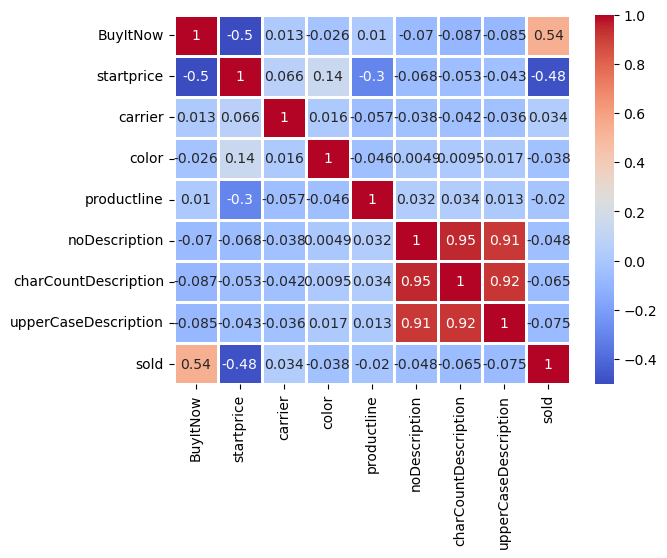

In [30]:
sns.heatmap(ebay_corr, cmap = 'coolwarm', annot = True, linewidth = 1, linecolor = 'white')

In [38]:
ebay_with_char = ebay.drop(['noDescription', 'upperCaseDescription'], axis = 1)
ebay_with_char

,BuyItNow,startprice,carrier,color,productline,charCountDescription,sold
0,0,199.99,1,7,6,0,1
1,0,235.00,1,4,2,0,0
2,0,199.99,1,4,7,100,0
3,1,175.00,0,6,2,0,1
4,1,100.00,1,6,5,0,1
...,...,...,...,...,...,...,...
1480,0,89.50,0,4,4,96,0
1481,0,239.95,1,3,6,97,1
1482,0,329.99,1,6,0,93,0
1483,0,89.00,1,3,4,92,1


In [39]:
# char만 남기고 no, upper을 지운 버전
X = ebay_with_char.drop('sold', axis = 1)
y = ebay_with_char['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7643097643097643
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       147
           1       0.79      0.72      0.76       150

    accuracy                           0.76       297
   macro avg       0.77      0.76      0.76       297
weighted avg       0.77      0.76      0.76       297



In [40]:
ebay_with_no = ebay.drop(['charCountDescription', 'upperCaseDescription'], axis = 1)
ebay_with_no

,BuyItNow,startprice,carrier,color,productline,noDescription,sold
0,0,199.99,1,7,6,0,1
1,0,235.00,1,4,2,0,0
2,0,199.99,1,4,7,1,0
3,1,175.00,0,6,2,0,1
4,1,100.00,1,6,5,0,1
...,...,...,...,...,...,...,...
1480,0,89.50,0,4,4,1,0
1481,0,239.95,1,3,6,1,1
1482,0,329.99,1,6,0,1,0
1483,0,89.00,1,3,4,1,1


In [41]:
# no만 남기고 char, upper을 지운 버전
X = ebay_with_no.drop('sold', axis = 1)
y = ebay_with_no['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7407407407407407
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       147
           1       0.77      0.69      0.73       150

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.74      0.74      0.74       297



In [42]:
ebay_with_upper = ebay.drop(['charCountDescription', 'noDescription'], axis = 1)
ebay_with_upper

,BuyItNow,startprice,carrier,color,productline,upperCaseDescription,sold
0,0,199.99,1,7,6,0,1
1,0,235.00,1,4,2,0,0
2,0,199.99,1,4,7,2,0
3,1,175.00,0,6,2,0,1
4,1,100.00,1,6,5,0,1
...,...,...,...,...,...,...,...
1480,0,89.50,0,4,4,2,0
1481,0,239.95,1,3,6,5,1
1482,0,329.99,1,6,0,1,0
1483,0,89.00,1,3,4,2,1


In [43]:
# no만 남기고 char, upper을 지운 버전
X = ebay_with_upper.drop('sold', axis = 1)
y = ebay_with_upper['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7373737373737373
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       147
           1       0.76      0.69      0.73       150

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.74      0.74      0.74       297



### charCountDescription만 남겼을 때가 가장 좋은 정확도를 나타냄

In [44]:
ebay_with_char

,BuyItNow,startprice,carrier,color,productline,charCountDescription,sold
0,0,199.99,1,7,6,0,1
1,0,235.00,1,4,2,0,0
2,0,199.99,1,4,7,100,0
3,1,175.00,0,6,2,0,1
4,1,100.00,1,6,5,0,1
...,...,...,...,...,...,...,...
1480,0,89.50,0,4,4,96,0
1481,0,239.95,1,3,6,97,1
1482,0,329.99,1,6,0,93,0
1483,0,89.00,1,3,4,92,1


<Axes: xlabel='sold,productline'>

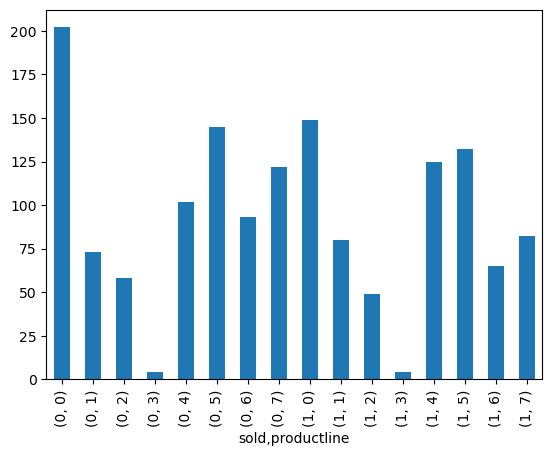

In [46]:
ebay[['productline', 'sold']].groupby("sold").value_counts(sort = False).plot(kind = 'bar')

- 0(Galaxy_Note10), 6('Galaxy_S9'), 7('Unknown')이 차이가 많이 남
- 0, 6, 7일 경우 많이 안 삼
- 4('Galaxy_S7')일 땐 많이 삼

<Axes: xlabel='sold,color'>

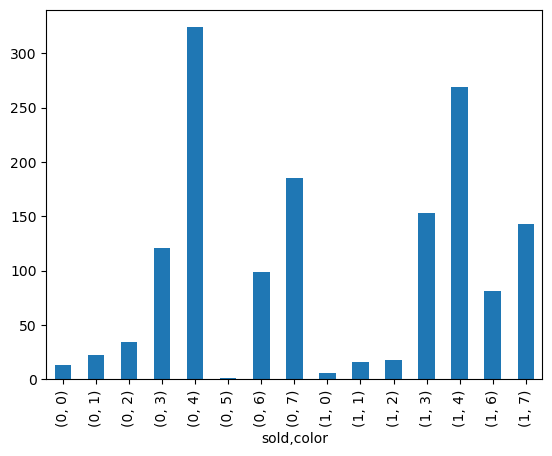

In [55]:
ebay[['color', 'sold']].groupby("sold").value_counts(sort = False).plot(kind = 'bar')

- 3('Midnight Black')일 때 더 삼
- 대체로 덜 삼
- 4(None)일 때가 제일 차이가 나는데
- 4(None)일 때가 그래도 가장 많이 삼

<Axes: xlabel='sold,carrier'>

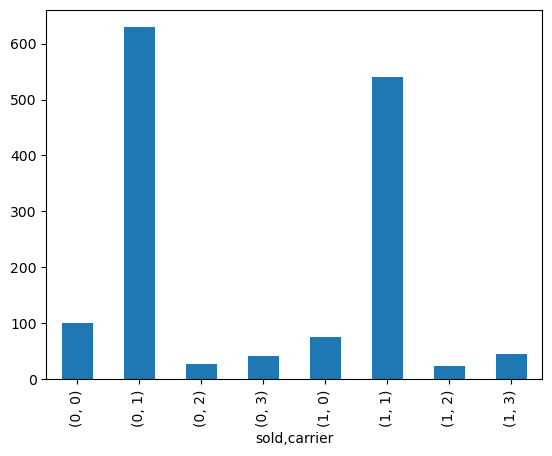

In [56]:
ebay[['carrier', 'sold']].groupby("sold").value_counts(sort = False).plot(kind = 'bar')

<Axes: xlabel='BuyItNow,productline'>

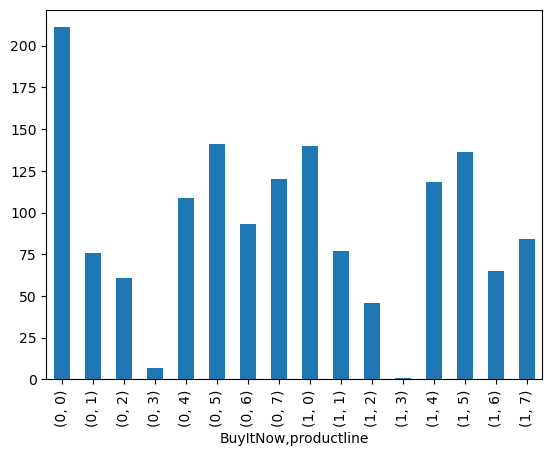

In [75]:
ebay[['productline', 'BuyItNow']].groupby("BuyItNow").value_counts(sort = False).plot(kind = 'bar')

In [ ]:
['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown']

# feature engineering

가격을 범주형으로 바꿔보기

In [59]:
ebay_with_char['startprice'].describe()

count    1485.000000
mean      216.844162
std       172.893308
min         0.010000
25%        80.000000
50%       198.000000
75%       310.000000
max       999.000000
Name: startprice, dtype: float64

In [58]:
def startprice_category(x) :
    if 0 <= x < 100 :
        return '100달러미만'
    elif 100<= x < 200 :
        return '100s$'
    elif 200<= x < 300 :
        return '200s$'
    elif 300<= x < 400 :
        return '300s$'
    elif 400<= x < 500 :
        return '400s$'
    elif 500<= x < 600 :
        return '500s$'
    elif 600<= x < 700 :
        return '600s$'
    elif 700<= x < 800 :
        return '700s$'
    elif 800<= x < 900 :
        return '800s$'
    elif 900<= x < 1000 :
        return '900s$'

In [66]:
ebay_with_char['startprice'] = ebay_with_char['startprice'].apply(startprice_category)

In [67]:
ebay_with_char['startprice'].unique()

array(['100s$', '200s$', '100달러미만', '300s$', '400s$', '500s$', '600s$',
       '700s$', '800s$', '900s$'], dtype=object)

In [68]:
data = pd.get_dummies(ebay_with_char, columns = ['startprice'], drop_first = True)
data

,BuyItNow,carrier,color,productline,charCountDescription,sold,startprice_100달러미만,startprice_200s$,startprice_300s$,startprice_400s$,startprice_500s$,startprice_600s$,startprice_700s$,startprice_800s$,startprice_900s$
0,0,1,7,6,0,1,False,False,False,False,False,False,False,False,False
1,0,1,4,2,0,0,False,True,False,False,False,False,False,False,False
2,0,1,4,7,100,0,False,False,False,False,False,False,False,False,False
3,1,0,6,2,0,1,False,False,False,False,False,False,False,False,False
4,1,1,6,5,0,1,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,0,4,4,96,0,True,False,False,False,False,False,False,False,False
1481,0,1,3,6,97,1,False,True,False,False,False,False,False,False,False
1482,0,1,6,0,93,0,False,False,True,False,False,False,False,False,False
1483,0,1,3,4,92,1,True,False,False,False,False,False,False,False,False


In [69]:
# 가격 범주형으로 바꾼 거 의사결정나무에넣고 돌려보기
X = data.drop('sold', axis = 1)
y = data['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier(max_depth = 6, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(i, accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

9 0.7946127946127947
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       147
           1       0.82      0.75      0.79       150

    accuracy                           0.79       297
   macro avg       0.80      0.80      0.79       297
weighted avg       0.80      0.79      0.79       297



In [71]:
for i in range(1, 10) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.7609427609427609
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       147
           1       0.86      0.63      0.73       150

    accuracy                           0.76       297
   macro avg       0.78      0.76      0.76       297
weighted av

In [72]:
for i in range(1, 10) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.7609427609427609
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       147
           1       0.86      0.63      0.73       150

    accuracy                           0.76       297
   macro avg       0.78      0.76      0.76       297
weighted av

In [73]:
for i in range(1, 10) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
    dtc = DecisionTreeClassifier(criterion = 'log_loss', max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.7609427609427609
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       147
           1       0.86      0.63      0.73       150

    accuracy                           0.76       297
   macro avg       0.78      0.76      0.76       297
weighted av

In [74]:
# 가격 범주형으로 돌린 건 이게 제일 좋음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(i, accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

9 0.7946127946127947
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       147
           1       0.81      0.78      0.79       150

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.80      0.79      0.79       297



# 데이터 분리 및 분석

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [32]:
X = ebay.drop('sold', axis = 1)
y = ebay['sold']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7609427609427609
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       147
           1       0.80      0.70      0.75       150

    accuracy                           0.76       297
   macro avg       0.77      0.76      0.76       297
weighted avg       0.77      0.76      0.76       297



In [126]:
# 통신사도 제외한 거
# color도 제외
X_c = ebay.drop(['sold', 'carrier', 'color'], axis = 1)
y_c = ebay['sold']
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier(max_depth=6, random_state = 8)
dtc.fit(X_c_train, y_c_train)
pred = dtc.predict(X_c_test)
print(accuracy_score(y_c_test, pred))
print(classification_report(y_c_test, pred))

0.8013468013468014
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       147
           1       0.85      0.73      0.79       150

    accuracy                           0.80       297
   macro avg       0.81      0.80      0.80       297
weighted avg       0.81      0.80      0.80       297



# 성능 평가 및 성능 개선을 위한 튜닝

In [49]:
# char만 남기고 no, upper을 지운 버전
# test_size 변경하며 돌리기
X = ebay_with_char.drop('sold', axis = 1)
y = ebay_with_char['sold']
for i in range(1, 10) : 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/10, random_state = 8)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(1/10, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

0.1 0.8053691275167785
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        80
           1       0.80      0.77      0.79        69

    accuracy                           0.81       149
   macro avg       0.81      0.80      0.80       149
weighted avg       0.81      0.81      0.80       149

0.1 0.7609427609427609
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       147
           1       0.80      0.71      0.75       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

0.1 0.7197309417040358
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       228
           1       0.72      0.69      0.71       218

    accuracy                           0.72       446
   macro avg       0.72      0.72      0.72       446
weigh

In [50]:
# max_depth를 변경하며 돌리기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
for i in range(1, 10) : 
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.734006734006734
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       147
           1       0.85      0.57      0.69       150

    accuracy                           0.73       297
   macro avg       0.76      0.74      0.73       297
weighted avg

In [51]:
# max_depth를 변경하며 돌리기
# entropy로 돌리기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
for i in range(1, 10) : 
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.734006734006734
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       147
           1       0.85      0.57      0.69       150

    accuracy                           0.73       297
   macro avg       0.76      0.74      0.73       297
weighted avg

In [52]:
# max_depth를 변경하며 돌리기
# log_loss로 돌리기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
for i in range(1, 10) : 
    dtc = DecisionTreeClassifier(criterion = 'log_loss', max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.734006734006734
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       147
           1       0.85      0.57      0.69       150

    accuracy                           0.73       297
   macro avg       0.76      0.74      0.73       297
weighted avg

In [53]:
# 이게 제일 좋은듯
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
dtc = DecisionTreeClassifier(max_depth = 6, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(i, accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

9 0.8047138047138047
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       147
           1       0.84      0.75      0.80       150

    accuracy                           0.80       297
   macro avg       0.81      0.81      0.80       297
weighted avg       0.81      0.80      0.80       297



# 강사님 버전

In [5]:
pho = pd.read_csv("http://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
pho

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1


In [105]:
pho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [79]:
pho.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [80]:
pho['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [83]:
pho.groupby('carrier')['sold'].value_counts(sort= False)

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Verizon          0        41
                 1        46
Name: count, dtype: int64

통신사는 판매에 큰 영향을 미치지 않는 것으로 판단되고 너무 많은 결측이 있어 삭제예정

In [88]:
pho.groupby('productline')['color'].value_counts(sort= False)

productline    color         
Galaxy_Note10  Aura Black         19
               Gold               46
               Space Gray         91
               White              76
Galaxy_Note8   Gold                1
               Midnight Black     58
               Space Gray          2
               White              44
Galaxy_Note9   Black              10
               Space Gray         27
               White              37
Galaxy_S10     Gold                1
               Prism Black         1
               Space Gray          1
               White               5
Galaxy_S7      Midnight Black    111
               Space Gray          3
               White              21
Galaxy_S8      Midnight Black     59
               Space Gray         38
               White              55
Galaxy_S9      Midnight Black     46
               Space Gray          1
               White              51
Unknown        Black              28
               Gold                4
        

In [94]:
# 갤럭시노트9의 평균 가격을 알아보기 위함
pho.loc[pho['productline'] == 'Galaxy_Note9', 'startprice'].describe()

count    107.000000
mean     254.561402
std      126.208902
min        0.010000
25%      177.500000
50%      259.950000
75%      349.990000
max      575.000000
Name: startprice, dtype: float64

In [97]:
# 기종을 모르는 핸드폰의 검은색 제품의 평균 가격을 알아보기 위함
pho.loc[(pho['productline'] == 'Unknown') & (pho['color'] == 'Black'), 'startprice'].describe()

count     28.000000
mean     134.785714
std      134.173500
min        0.990000
25%       15.000000
50%       99.995000
75%      202.492500
max      473.600000
Name: startprice, dtype: float64

In [100]:
pho[pho['color'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [6]:
pho_no_color = pho.copy()

기종 별로 색상 최빈값을 구해서 color nan값을 대치

In [7]:
color_by_product = pho.groupby('productline')['color'].value_counts()
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [8]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_Note10'), 'color'] = 'Space Gray'

In [9]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_Note8'), 'color'] = 'Midnight Black'

In [10]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_Note9'), 'color'] = 'White'

In [11]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_S10'), 'color'] = 'White'

In [12]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_S7'), 'color'] = 'Midnight Black'

In [13]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_S8'), 'color'] = 'Midnight Black'

In [14]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Galaxy_S9'), 'color'] = 'White'

In [15]:
pho.loc[(pho['color'].isna() == True) & (pho['productline'] == 'Unknown'), 'color'] = 'White'

In [16]:
pho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [17]:
pho.groupby('color')['sold'].value_counts(sort = False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       257
                1       282
Prism Black     0         1
Space Gray      0       165
                1       134
White           0       307
                1       230
Name: count, dtype: int64

컬러가 판매에 큰 영향을 주는 거 같지는 않음

In [18]:
pho['color'].unique()

array(['White', 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [19]:
for i in list(pho['color'].unique()) :
    if "Black" in i :
        print(i)

Midnight Black
Aura Black
Black
Prism Black


In [21]:
pho['color'] = pho['color'].apply(lambda x : "Black" if "Black" in x else x)
pho['color']

0            White
1            White
2            White
3       Space Gray
4       Space Gray
           ...    
1480         Black
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [23]:
pho['color'].value_counts()

color
Black         597
White         537
Space Gray    299
Gold           52
Name: count, dtype: int64

<Axes: xlabel='startprice', ylabel='Count'>

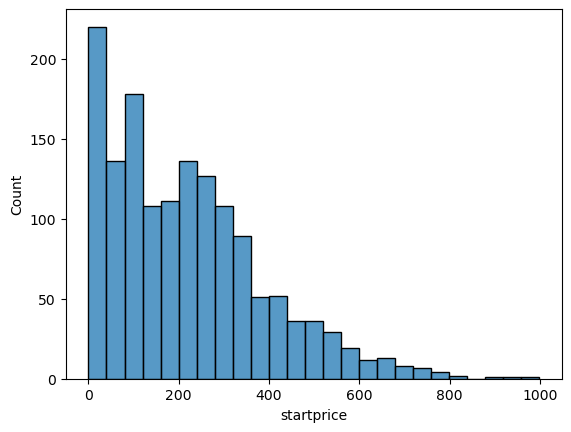

In [25]:
sns.histplot(pho['startprice'])

In [26]:
pho['startprice'].describe()

count    1485.000000
mean      216.844162
std       172.893308
min         0.010000
25%        80.000000
50%       198.000000
75%       310.000000
max       999.000000
Name: startprice, dtype: float64

In [28]:
# pho['startprice']의 이상치 계산
print("정상 범위 최댓값", 310.000000 + 1.5 * (310.000000 - 80.000000))

정상 범위 최댓값 655.0


In [29]:
pho[pho['startprice'] > 655]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
505,0,785.00,Sprint/T-Mobile,Gold,Galaxy_Note10,contains description,0,0,0
617,1,800.00,NaN,Gold,Galaxy_Note10,contains description,0,0,0
703,0,795.99,AT&T,Space Gray,Galaxy_Note10,contains description,0,0,0
714,0,660.00,NaN,White,Galaxy_Note10,contains description,0,0,0
730,0,675.00,NaN,White,Galaxy_Note10,contains description,0,0,1
742,0,829.99,NaN,Gold,Galaxy_Note10,contains description,0,0,0
766,0,900.00,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
801,0,699.00,NaN,Space Gray,Galaxy_Note10,no description,12,0,0


In [31]:
mean_by_product = pho.groupby('productline')['startprice'].describe()
mean_by_product

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [33]:
mean_by_product['maxprice'] = mean_by_product.apply(lambda x : x['75%'] + 1.5 * (x['75%'] - x['25%']), axis = 1)
mean_by_product['maxprice']

productline
Galaxy_Note10    874.9250
Galaxy_Note8     451.2000
Galaxy_Note9     608.7250
Galaxy_S10       485.0000
Galaxy_S7        189.3575
Galaxy_S8        440.0150
Galaxy_S9        531.1950
Unknown          582.4850
Name: maxprice, dtype: float64

In [43]:
for product, price in mean_by_product[['maxprice']].iterrows() :
    display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])

C:\Users\5-08\AppData\Local\Temp\ipykernel_1652\1686907582.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


C:\Users\5-08\AppData\Local\Temp\ipykernel_1652\1686907582.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Black,Galaxy_Note8,contains description,0,0,0


C:\Users\5-08\AppData\Local\Temp\ipykernel_1652\1686907582.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


C:\Users\5-08\AppData\Local\Temp\ipykernel_1652\1686907582.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Black,Galaxy_S8,contains description,0,0,0


C:\Users\5-08\AppData\Local\Temp\ipykernel_1652\1686907582.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


C:\Users\5-08\AppData\Local\Temp\ipykernel_1652\1686907582.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(pho[(pho['productline'] == product) & (pho['startprice'] > price[0])])


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [45]:
for idx, item in zip(mean_by_product['maxprice'].index, mean_by_product['maxprice']) :
    display(pho[(pho['productline'] == idx) & (pho['startprice'] > item)])

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Black,Galaxy_Note8,contains description,0,0,0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Black,Galaxy_S8,contains description,0,0,0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [39]:
pho[(pho['productline'] == 'Galaxy_Note10') & (pho['startprice'] > 874.9250)]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


In [48]:
pho.groupby('color')['sold'].value_counts(sort = False)

color       sold
Black       0       293
            1       304
Gold        0        34
            1        18
Space Gray  0       165
            1       134
White       0       307
            1       230
Name: count, dtype: int64

컬러는 구매에 큰 영향이 없다

In [49]:
pho['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [51]:
pho.groupby('productline')['sold'].value_counts(sort = False)

productline    sold
Galaxy_Note10  0       202
               1       149
Galaxy_Note8   0        73
               1        80
Galaxy_Note9   0        58
               1        49
Galaxy_S10     0         4
               1         4
Galaxy_S7      0       102
               1       125
Galaxy_S8      0       145
               1       132
Galaxy_S9      0        93
               1        65
Unknown        0       122
               1        82
Name: count, dtype: int64

기종에 따라서 판매량이 크게 달라지지 않는다.

In [53]:
pho['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [54]:
def reverse_value(x) :
    if x == 'contains description' :
        return "no description"
    else :
        return 'contains description'

In [57]:
pho['noDescription'] = pho['noDescription'].apply(reverse_value)
pho['noDescription']

0             no description
1             no description
2       contains description
3             no description
4             no description
                ...         
1480    contains description
1481    contains description
1482    contains description
1483    contains description
1484    contains description
Name: noDescription, Length: 1485, dtype: object

In [58]:
pho.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0
2,0,199.99,NaN,White,Unknown,contains description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1


In [59]:
pho.groupby('noDescription')['sold'].value_counts()

noDescription         sold
contains description  0       356
                      1       273
no description        0       443
                      1       413
Name: count, dtype: int64

noDescription도 판매와는 관계가 없다.

<Axes: xlabel='charCountDescription', ylabel='Count'>

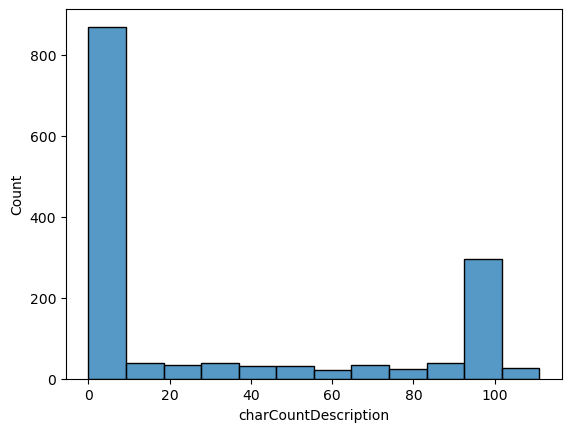

In [60]:
sns.histplot(pho['charCountDescription'])

In [61]:
pho[pho['charCountDescription']>0]['sold'].value_counts()

sold
0    356
1    273
Name: count, dtype: int64

글자수도 판매와는 관련이 없다

<Axes: xlabel='upperCaseDescription', ylabel='Count'>

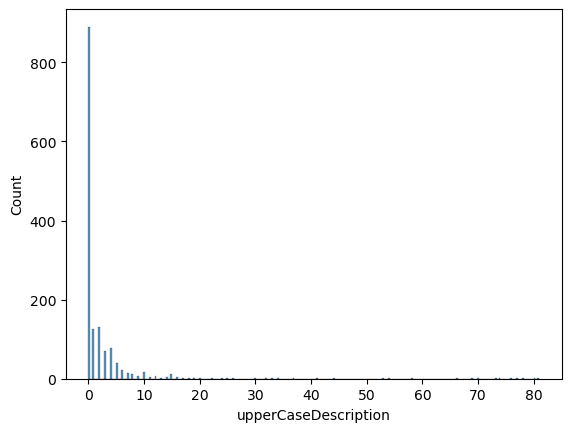

In [62]:
sns.histplot(pho['upperCaseDescription'])

In [64]:
pho[pho['upperCaseDescription'] > 0]['sold'].value_counts()

sold
0    343
1    252
Name: count, dtype: int64

upper도 판매에 영향이 없다.

In [66]:
pho['BuyItNow'].value_counts()

BuyItNow
0    818
1    667
Name: count, dtype: int64

In [68]:
pho.groupby('BuyItNow')['sold'].value_counts(sort = False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

In [70]:
print(179 / (639 + 179) * 100)
print(507 / (160 + 507) * 100)

21.882640586797066
76.01199400299849


BuyItNow가 1일 때 판매량이 높다

# Feature Engineering

In [72]:
pho.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0


carrier, noDescription, charCountDescription, upperCaseDescription을 삭제하기로 함

In [75]:
pho = pho.drop(['carrier', 'noDescription', 'charCountDescription', 'upperCaseDescription'], axis = 1)
pho

,BuyItNow,startprice,color,productline,sold
0,0,199.99,White,Galaxy_S9,1
1,0,235.00,White,Galaxy_Note9,0
2,0,199.99,White,Unknown,0
3,1,175.00,Space Gray,Galaxy_Note9,1
4,1,100.00,Space Gray,Galaxy_S8,1
...,...,...,...,...,...
1480,0,89.50,Black,Galaxy_S7,0
1481,0,239.95,Black,Galaxy_S9,1
1482,0,329.99,Space Gray,Galaxy_Note10,0
1483,0,89.00,Black,Galaxy_S7,1


In [78]:
pho = pd.get_dummies(pho, drop_first = True)
pho.head()

,BuyItNow,startprice,sold,color_Gold,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown
0,0,199.99,1,False,False,True,False,False,False,False,False,True,False
1,0,235.00,0,False,False,True,False,True,False,False,False,False,False
2,0,199.99,0,False,False,True,False,False,False,False,False,False,True
3,1,175.00,1,False,True,False,False,True,False,False,False,False,False
4,1,100.00,1,False,True,False,False,False,False,False,True,False,False


In [79]:
X_pho = pho.drop('sold', axis = 1)
y_pho = pho['sold']

In [80]:
from sklearn.model_selection import train_test_split

In [87]:
X_pho_train, X_pho_test, y_pho_train, y_pho_test = train_test_split(X_pho, y_pho, test_size = 0.2, random_state = 7)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [85]:
dtc_pho = DecisionTreeClassifier(max_depth = 3, random_state = 7)
dtc_pho.fit(X_pho_train, y_pho_train)
pred_pho = dtc_pho.predict(X_pho_test)
print("accuracy_score", accuracy_score(y_pho_test, pred_pho))
print("classification_report", classification_report(y_pho_test, pred_pho))

accuracy_score 0.7780269058295964
classification_report               precision    recall  f1-score   support

           0       0.79      0.80      0.79       239
           1       0.76      0.75      0.76       207

    accuracy                           0.78       446
   macro avg       0.78      0.78      0.78       446
weighted avg       0.78      0.78      0.78       446



In [88]:
for i in range(1, 30) :
    dtc_pho = DecisionTreeClassifier(max_depth = i, random_state = 7)
    dtc_pho.fit(X_pho_train, y_pho_train)
    pred_pho = dtc_pho.predict(X_pho_test)
    print(i, "accuracy_score", accuracy_score(y_pho_test, pred_pho))
    print(i, "classification_report", classification_report(y_pho_test, pred_pho))

1 accuracy_score 0.7811447811447811
1 classification_report               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 accuracy_score 0.7811447811447811
2 classification_report               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

3 accuracy_score 0.7777777777777778
3 classification_report               precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

  

23 accuracy_score 0.7508417508417509
23 classification_report               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297

24 accuracy_score 0.7508417508417509
24 classification_report               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297

25 accuracy_score 0.7508417508417509
25 classification_report               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       1

In [89]:
dtc_pho = DecisionTreeClassifier(max_depth = 9, random_state = 7)
dtc_pho.fit(X_pho_train, y_pho_train)
pred_pho = dtc_pho.predict(X_pho_test)
print("accuracy_score", accuracy_score(y_pho_test, pred_pho))
print("classification_report", classification_report(y_pho_test, pred_pho))

accuracy_score 0.7912457912457912
classification_report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       158
           1       0.80      0.74      0.77       139

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297

